Tracking Behaviour of MNIST classification with several ANN

In [72]:
%matplotlib inline
import warnings
#warnings.filterwarnings("ignore")
warnings.filterwarnings(action='once')

import keras

#these work the same, pick oneto work with
#from keras.datasets import mnist
from keras.datasets import fashion_mnist

from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils 

from sklearn import metrics

from matplotlib import pyplot as plt
import seaborn as sns
import random
from random import randint
import numpy as np

from timeit import default_timer as timer


In [77]:
# Preparing the dataset
# Setup train and test splits
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
((x_train, y_train), (x_test, y_test)) = fashion_mnist.load_data()

# Making a copy before processing to display
x_train_drawing = x_train
y_train_drawing = y_train
x_test_drawing = x_test
y_test_drawing = y_test


image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Convert class vectors to one hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

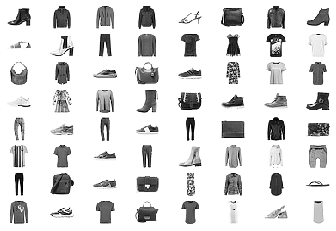

In [78]:
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

In [ ]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))

    return model

In [ ]:
def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [87]:
model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [88]:
start = timer()


model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)


end = timer()
print("Total elaped time: ",end - start) # Time in seconds

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 1s 19us/step - loss: 1.4926 - acc: 0.5787 - val_loss: 1.1692 - val_acc: 0.6950
Epoch 2/5
54000/54000 [==============================] - 1s 19us/step - loss: 1.0624 - acc: 0.7115 - val_loss: 0.9698 - val_acc: 0.7327
Epoch 3/5
54000/54000 [==============================] - 1s 20us/step - loss: 0.9033 - acc: 0.7392 - val_loss: 0.8537 - val_acc: 0.7528
Epoch 4/5
54000/54000 [==============================] - 1s 15us/step - loss: 0.8041 - acc: 0.7636 - val_loss: 0.7640 - val_acc: 0.7762
Epoch 5/5
54000/54000 [==============================] - 1s 14us/step - loss: 0.7474 - acc: 0.7712 - val_loss: 0.7532 - val_acc: 0.7632
Total elaped time:  4.925216383999214


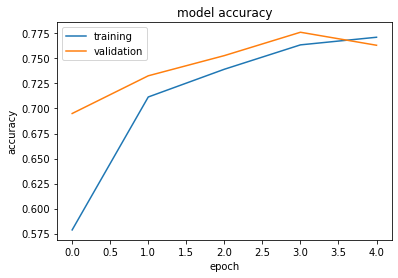

Test loss: 0.768
Test accuracy: 0.753


In [89]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')



In [82]:
score=model.evaluate(x_test, y_test,verbose=0)
print ("score: ",score  )

score:  [0.5534742712020874, 0.7957]


Incorrects: 2043  Rows:  5  Cols:  7


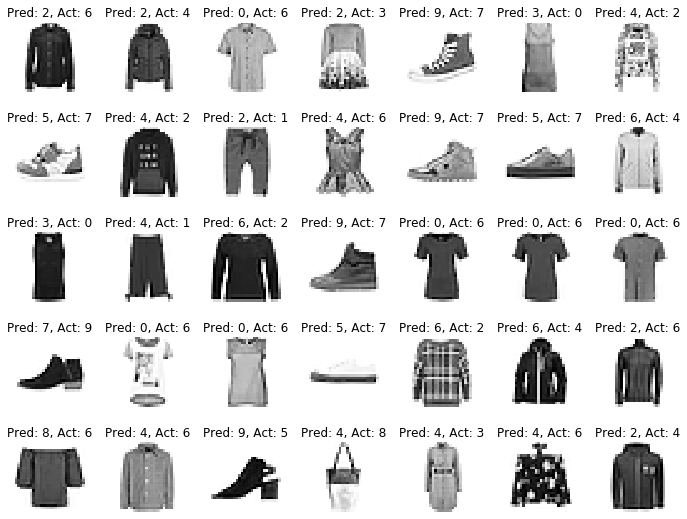

In [83]:


predictions = model.predict(x_test)

preds = np.argmax(predictions, axis=1)
trues = np.argmax(y_test, axis=1)

#print("Incorrects:", len(preds))

badpred= []
nbrincorrect = 0
for i in range(len(preds)):
    if preds[i] != trues[i]:
        nbrincorrect = nbrincorrect +1
        badpred.append(i)
#        print("label:",trues[i]," predict: ",preds[i])
            
#print(badpred)

totsamp = 35

if len(badpred) > totsamp:
    sample = random.choices(badpred, k=totsamp)
else: sample = badpred

num_cols = 7
#num_rows = nbrincorrect // num_cols
num_rows =5
print("Incorrects:", nbrincorrect," Rows: ",num_rows," Cols: ",num_cols)


f, ax = plt.subplots(num_rows, num_cols, figsize=(12,9),
                     gridspec_kw={'wspace':0.2, 'hspace':0.5}, 
                     squeeze=True)
count = 0
for r in range(num_rows):
    for c in range(num_cols):
        image_index = count
        ax[r,c].axis("off")
        ax[r,c].imshow(x_test_drawing[sample[count]], cmap='Greys')
        titstr = "Pred: "+str(preds[sample[count]])+", Act: "+str(trues[sample[count]])
        ax[r,c].set_title(titstr)
        count = count + 1
       
plt.show()
plt.close()

In [84]:
cm = metrics.confusion_matrix(trues,  preds)
print(cm)

[[783   7  21  88   8   0  77   1  15   0]
 [  0 944  12  34   8   0   0   0   2   0]
 [ 14   1 827  10  90   0  52   0   6   0]
 [ 39  13  28 844  57   0  15   0   4   0]
 [  0   1 347  35 563   0  46   0   8   0]
 [  1   0   0   3   0 885   0  39   5  67]
 [180   3 183  69 151   0 391   0  23   0]
 [  0   0   0   0   0  63   0 840   0  97]
 [  3   1   9  12   4   5  32   6 927   1]
 [  0   0   0   0   0  12   0  34   1 953]]


C:\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


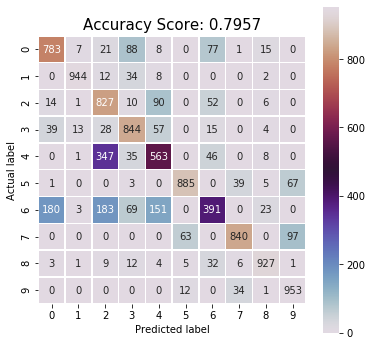

In [85]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'twilight');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [56]:

sampling = random.choices(badpred, k=50)
print(sampling)

[6964, 2016, 658, 947, 1292, 7990, 4271, 2198, 1678, 3206, 3736, 1790, 4942, 9422, 1754, 7130, 1248, 1730, 1765, 9280, 1759, 1955, 7545, 2393, 8316, 7856, 5749, 6813, 1955, 8520, 4435, 1068, 4640, 4433, 8183, 8372, 2305, 362, 1260, 2024, 9892, 4400, 3218, 5887, 658, 4837, 3245, 247, 7216, 1204]
